<a href="https://colab.research.google.com/github/glomanu/football-home-adv/blob/main/New_Home_adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported the functions that might come of use throughout the investigation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df1=pd.read_csv('results.csv') #remember to upload the file
df2=pd.read_csv('shootouts.csv') #remember to upload the file
df1, df2

(             date home_team         away_team  home_score  away_score  \
 0      1872-11-30  Scotland           England         0.0         0.0   
 1      1873-03-08   England          Scotland         4.0         2.0   
 2      1874-03-07  Scotland           England         2.0         1.0   
 3      1875-03-06   England          Scotland         2.0         2.0   
 4      1876-03-04  Scotland           England         3.0         0.0   
 ...           ...       ...               ...         ...         ...   
 44055  2022-09-27    Norway            Serbia         0.0         2.0   
 44056  2022-09-27    Sweden          Slovenia         1.0         1.0   
 44057  2022-09-27    Kosovo            Cyprus         5.0         1.0   
 44058  2022-09-27    Greece  Northern Ireland         3.0         1.0   
 44059  2022-09-30      Fiji   Solomon Islands         NaN         NaN   
 
                      tournament        city   country  neutral  
 0                      Friendly     Glasgow

In [3]:
print(df1.dtypes)
print()
print(df2.dtypes)

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral          bool
dtype: object

date         object
home_team    object
away_team    object
winner       object
dtype: object


Some rows have NaN value, so I will delete them.

In [4]:
df1 = df1.dropna()
df2 = df2.dropna()

In [5]:
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [6]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False


In [7]:
len(df1['date'])

44059

In [8]:
df1['outcome'] = 0
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,0
...,...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,0
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,0
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,0
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,0


In [9]:
for i in range(0, len(df1['date'])): #Gets the i element of the table
  if df1.iloc[i][3] > df1.iloc[i][4]: #Checks if the home goals are greater than that of the away goals
    df1['outcome'][i] = 1 #Sets outcome column equal to 1 if the home team won the match (has more goals than the away team)
  elif df1.iloc[i][3] == df1.iloc[i][4]: #
    df1['outcome'][i] = 0
  else:
    df1['outcome'][i] = -1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1
...,...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,0
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,-1
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,0
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1


In [11]:
for i in range(0, len(df1['date'])): #Gets each i element in the first database(results)
  rowi = df1.iloc[i] #stores all the values of row i in a variable
  if rowi[9]!=0: #If the outcome is not 0(is not a tie) it is ignored
    continue
  for j in range(0, len(df2['date'])): #Gets each j element from the second database (shootouts)
    rowj = df2.iloc[j] #stores all the values of row j in a variable
    if rowi[0]==rowj[0] and rowi[1]==rowj[1]: #if the date of row i and row j match, and the name of the home team is the same...
      if rowj[1] == rowj[3]: #if the name of the home team in shootouts is the same as the name of the winning team in shootouts...
        df1['outcome'][i] = 1 #The outcome of the match is changed from 0 (tie in the outcome colume of results), to a 1 (home win in the outcome column of results)
      else: #if the name of the home team in shootouts is not the same as the name of the winning team in shootouts...
        df1['outcome'][i] = -1 #The outcome of the match is changed from 0 (tie in the outcome colume of results), to a -1 (away win in the outcome column of results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [12]:
df1.to_csv('modified_data.csv')

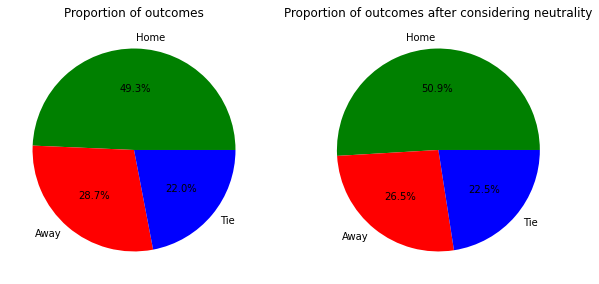

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

wins1=df1['outcome'].value_counts() #Counts the amount of each outcome that occured
wins1.index=['Home','Away','Tie'] #Changes the lable to Home Away or Tie to show who won the match
ax1.pie(wins1,labels=wins1.index,autopct='%.1f%%',colors=['green', 'red', 'blue']) #construct the pie chart
ax1.title.set_text('Proportion of outcomes') #setting a title of the plot

list_values = [] #creating an empty list
for i in range(0, len(df1['date'])): #iterating over all the rows
  rowi = df1.iloc[i] #storing an i-th row as rowi 
  if rowi[8]: #neutrality as a condition
    list_values.append(i) #if neutral=true then we add the index to the list
df1 = df1.drop(list_values) #getting rid of all the rows that correspond to the i-th indeces
df1.reset_index(drop=True, inplace=True) #resetting the indeces after dropping many rows
df1 = df1.drop('neutral', axis=1) #dropping the netutral column as it's useless now

wins2=df1['outcome'].value_counts() #Counts the amount of each outcome that occured
wins2.index=['Home','Away','Tie'] #Changes the lable to Home Away or Tie to show who won the match
ax2.pie(wins2,labels=wins2.index,autopct='%.1f%%',colors=['green', 'red', 'blue'], textprops={'color':"black"}) #construct the pie chart
ax2.title.set_text('Proportion of outcomes after considering neutrality') #setting a title of the plot

plt.show()



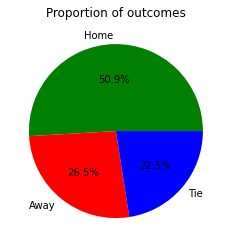

In [49]:
wins1=df1['outcome'].value_counts() #Counts the amount of each outcome that occured
wins1.index=['Home','Away','Tie'] #Changes the lable to Home Away or Tie to show who won the match
plot1 = plt.pie(wins1,labels=wins1.index,autopct='%.1f%%',colors=['green', 'red', 'blue']) #construct the pie chart
plt.title("Proportion of outcomes") #setting a title of the plot
plt.show() #makes the pie chart

In [17]:
list_values = [] #creating an empty list
for i in range(0, len(df1['date'])): #iterating over all the rows
  rowi = df1.iloc[i] #storing an i-th row as rowi 
  if rowi[8]: #neutrality as a condition
    list_values.append(i) #if neutral=true then we add the index to the list
df1 = df1.drop(list_values) #getting rid of all the rows that correspond to the i-th indeces
len(df1['date'])

33126

In [18]:
df1.reset_index(drop=True, inplace=True) #resetting the indeces after dropping many rows
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1
...,...,...,...,...,...,...,...,...,...,...
33121,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,0
33122,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,-1
33123,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,0
33124,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1


In [19]:
df1 = df1.drop('neutral', axis=1) #dropping the netutral column as it's useless now
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,1
...,...,...,...,...,...,...,...,...,...
33121,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,0
33122,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,-1
33123,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,0
33124,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,1


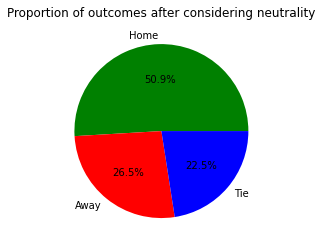

In [48]:
wins2=df1['outcome'].value_counts() #Counts the amount of each outcome that occured
wins2.index=['Home','Away','Tie'] #Changes the lable to Home Away or Tie to show who won the match
plot2 = plt.pie(wins2,labels=wins2.index,autopct='%.1f%%',colors=['green', 'red', 'blue'], textprops={'color':"black"}) #construct the pie chart
plt.title("Proportion of outcomes after considering neutrality") #setting a title of the plot
plt.show() #makes the pie chart

In [52]:
new_list_values = [] #creating an empty list
for i in range(0, len(df1['date'])): #iterating over all the rows
  rowi = df1.iloc[i] #storing an i-th row as rowi 
  if rowi[8]==0: # draw as a condition
    new_list_values.append(i) #if the game is a draw then we add the index to the list

df1 = df1.drop(new_list_values) #getting rid of all the rows that correspond to the i-th indeces

df1.reset_index(drop=True, inplace=True) #resetting the indeces after dropping many rows



In [53]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,outcome
0,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,1
1,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,1
2,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,1
3,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,1
4,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,-1
...,...,...,...,...,...,...,...,...,...
25653,2022-09-27,Switzerland,Czech Republic,2.0,1.0,UEFA Nations League,St. Gallen,Switzerland,1
25654,2022-09-27,Republic of Ireland,Armenia,3.0,2.0,UEFA Nations League,Dublin,Republic of Ireland,1
25655,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,-1
25656,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,1


In [54]:
print(wins2[0])
print()
print(wins2[1])

16871

8787
